In [1]:
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# add parent folder of notebook to path
sys.path.append(os.path.abspath(".."))



In [2]:
import Pipeline.results 
import importlib
importlib.reload(Pipeline.results)

Decision Tree predicts Team A wins 50.98%, Team B wins 49.02%
LogReg predicts Team A wins 49.76%, Team B wins 50.24%
SVM predicts Team A wins 40.24%, Team B wins 59.76%
MLP predicts Team A wins 48.05%, Team B wins 51.95%
  posteam_A  Season_A posteam_B  Season_B  proba_A_wins winner  \
0        GB      2011        SF      2011      0.310875      B   
1        NE      2016        GB      2011      0.678567      A   
2        NO      2009       IND      2009      0.582935      A   
3        NE      2010       DEN      2012      0.499891      A   
4       CAR      2015        NE      2011      0.398418      B   
5       IND      2009        SF      2011      0.312605      B   
6        SF      2011        NE      2010      0.443256      B   
7        NE      2011       DEN      2012      0.265106      B   
8       DEN      2012       IND      2009      0.598568      A   
9       ATL      2016       DEN      2012      0.442739      B   

  predicted_winner_team  
0                    SF  


<module 'Pipeline.results' from 'c:\\Users\\ttank\\OneDrive\\Documents\\Github\\finalProjectML\\Pipeline\\results.py'>

In [3]:
Pipeline.results.prediction.to_csv("../Predictions.csv", index=False)



In [4]:
df = pd.read_csv("../Predictions.csv")
df

,posteam_A,Season_A,posteam_B,Season_B,proba_A_wins,winner,predicted_winner_team
0,GB,2011,ATL,2016,0.237083,B,ATL
1,NE,2016,NO,2009,0.548759,A,NE
2,NO,2009,ATL,2016,0.302093,B,ATL
3,NE,2010,CAR,2015,0.630304,A,NE
4,CAR,2015,NE,2016,0.320525,B,NE
5,IND,2009,GB,2011,0.494503,A,IND
6,SF,2011,DEN,2012,0.438226,B,DEN
7,NE,2011,DEN,2012,0.265106,B,DEN
8,DEN,2012,CAR,2015,0.497877,A,DEN
9,ATL,2016,CAR,2015,0.575397,A,ATL


In [5]:
Pipeline.results.Bestmatchup

,posteam_A,Season_A,posteam_B,Season_B,InterceptionThrown,InterceptionThrown_B,Fumble,Fumble_B,Touchdown,Touchdown_B,...,FirstDown,FirstDown_B,PassAttempt,PassAttempt_B,PassOutcome,PassOutcome_B,CompletionPercentage,CompletionPercentage_B,win,win_B
0,GB,2011,ATL,2016,0.6250,0.5000,0.6875,0.5625,3.8125,3.7500,...,22.7500,24.7500,35.3125,35.4375,23.1875,24.1875,0.641801,0.682063,0.8125,0.7500
1,NE,2016,NO,2009,0.1250,0.8125,1.4375,1.5625,3.2500,3.8750,...,23.9375,23.7500,36.8750,35.3750,23.8750,24.1250,0.642576,0.681609,0.8125,0.8125
2,NO,2009,ATL,2016,0.8125,0.5000,1.5625,0.5625,3.8750,3.7500,...,23.7500,24.7500,35.3750,35.4375,24.1250,24.1875,0.681609,0.682063,0.8125,0.7500
3,NE,2010,CAR,2015,0.3125,0.6875,0.4375,0.9375,3.6250,3.5625,...,22.3750,24.7500,33.5625,32.9375,21.5000,19.0625,0.645250,0.580476,0.8125,0.8125
4,CAR,2015,NE,2016,0.6875,0.1250,0.9375,1.4375,3.5625,3.2500,...,24.7500,23.9375,32.9375,36.8750,19.0625,23.8750,0.580476,0.642576,0.8125,0.8125
5,IND,2009,GB,2011,1.2500,0.6250,0.7500,0.6875,3.2500,3.8125,...,24.1875,22.7500,39.2500,35.3125,25.6250,23.1875,0.653875,0.641801,0.8125,0.8125
6,SF,2011,DEN,2012,0.3750,0.7500,1.0000,1.1250,2.1875,3.4375,...,21.6250,26.6875,29.8125,38.8125,18.0000,25.7500,0.610676,0.670930,0.8125,0.8125
7,NE,2011,DEN,2012,0.8125,0.7500,0.8125,1.1250,3.6875,3.4375,...,26.3750,26.6875,40.0625,38.8125,25.6875,25.7500,0.639820,0.670930,0.8125,0.8125
8,DEN,2012,CAR,2015,0.7500,0.6875,1.1250,0.9375,3.4375,3.5625,...,26.6875,24.7500,38.8125,32.9375,25.7500,19.0625,0.670930,0.580476,0.8125,0.8125
9,ATL,2016,CAR,2015,0.5000,0.6875,0.5625,0.9375,3.7500,3.5625,...,24.7500,24.7500,35.4375,32.9375,24.1875,19.0625,0.682063,0.580476,0.7500,0.8125


In [6]:
Pipeline.results.results

[('Decision Tree accuracy', 0.6365853658536585),
 ('LogReg accuracy:', 0.6634146341463415),
 ('SVM accuracy:', 0.6560975609756098),
 ('Best MLP accuracy out of 10 tries:', 0.6170731707317073)]

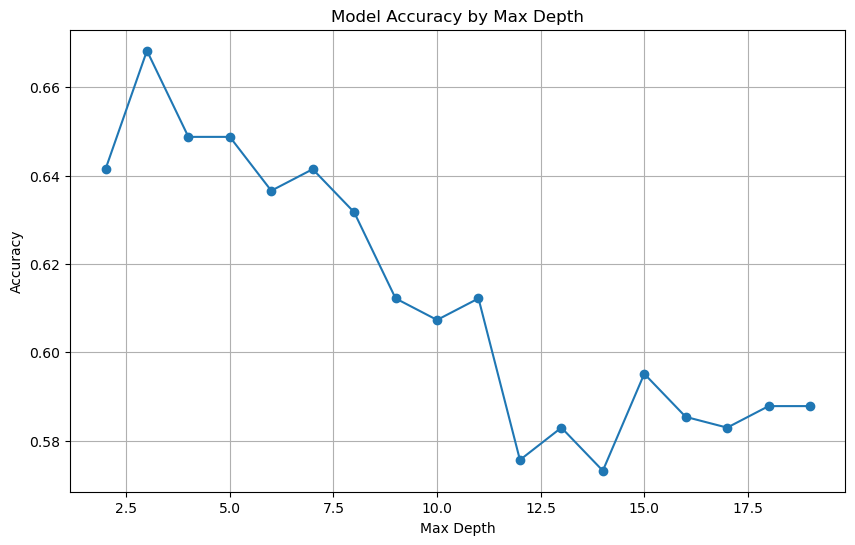

In [7]:
plt.figure(figsize=(10,6))
depths = list(range(2,20))
accuracies = []
for x in depths:
    model = DecisionTreeClassifier(max_depth=x, random_state=42)
    model.fit(Pipeline.results.X_train_scaled, Pipeline.results.y_train)
    acc = accuracy_score(Pipeline.results.y_test, model.predict(Pipeline.results.X_test_scaled))
    accuracies.append(acc)
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Max Depth')
plt.grid(True)
plt.show()

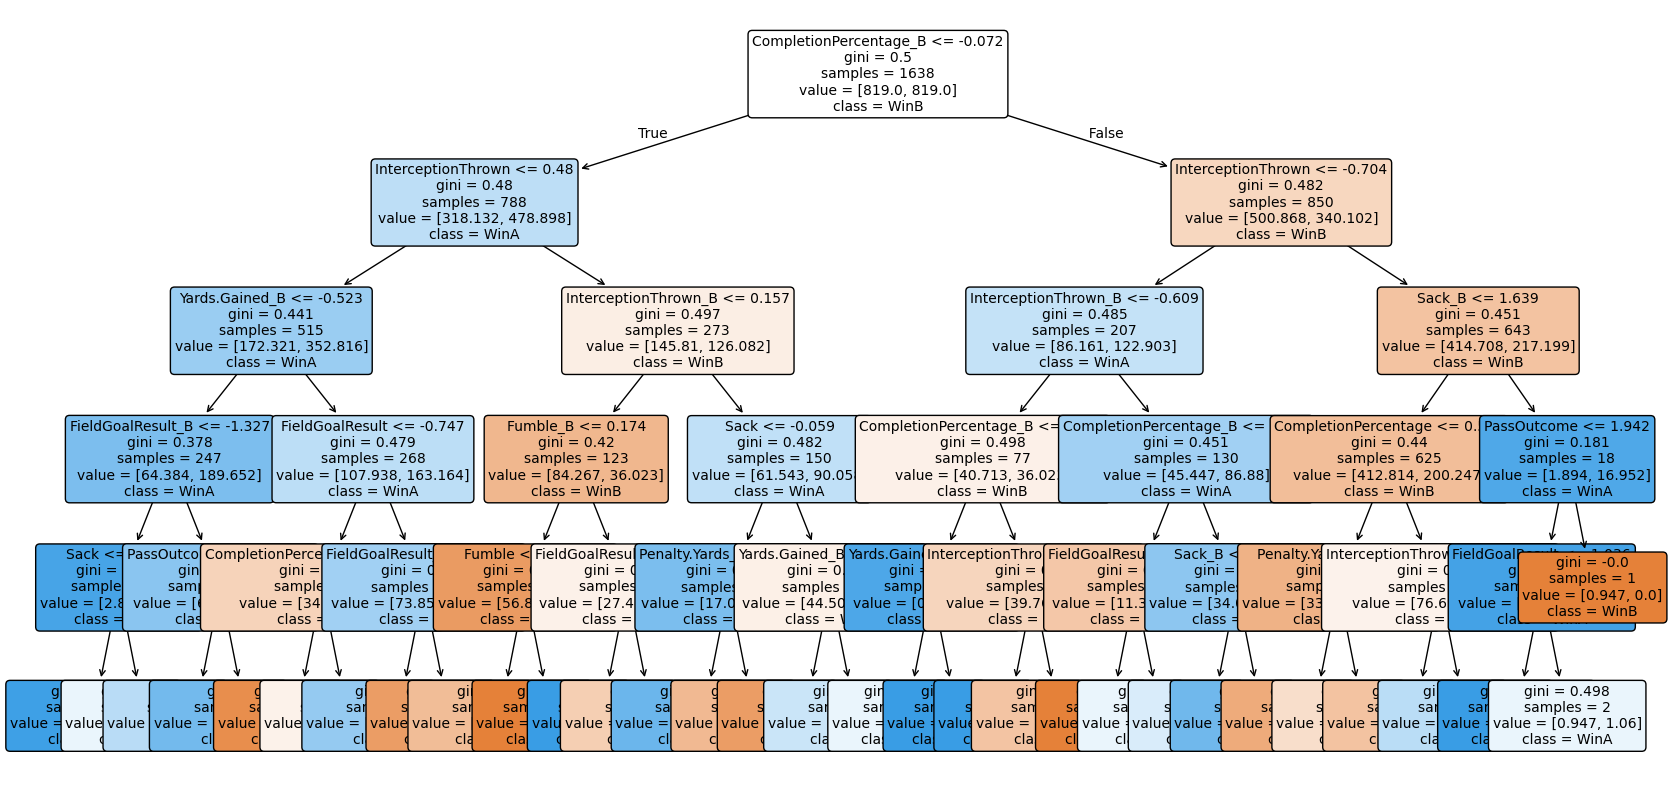

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(
    Pipeline.results.tree,
    feature_names=Pipeline.results.train_cols,
    class_names=['WinB', 'WinA'],
    filled=True,             # Colors nodes by class
    rounded=True,
    fontsize=10
)
plt.show()


In [9]:
feature_importances = pd.Series(Pipeline.results.tree.feature_importances_, index=Pipeline.results.train_cols)
feature_importances = feature_importances.sort_values(ascending=False)

print(feature_importances)

CompletionPercentage_B    0.214768
InterceptionThrown        0.206609
InterceptionThrown_B      0.107338
Sack_B                    0.079522
FieldGoalResult           0.074757
CompletionPercentage      0.058280
Yards.Gained_B            0.057656
FieldGoalResult_B         0.048253
Sack                      0.039582
Fumble_B                  0.028563
Penalty.Yards             0.022224
Fumble                    0.018949
Penalty.Yards_B           0.015866
PassOutcome_B             0.015066
PassOutcome               0.008680
Yards.Gained              0.003888
PassAttempt               0.000000
FirstDown                 0.000000
PuntBlocked_B             0.000000
FirstDown_B               0.000000
PassAttempt_B             0.000000
PuntBlocked               0.000000
dtype: float64


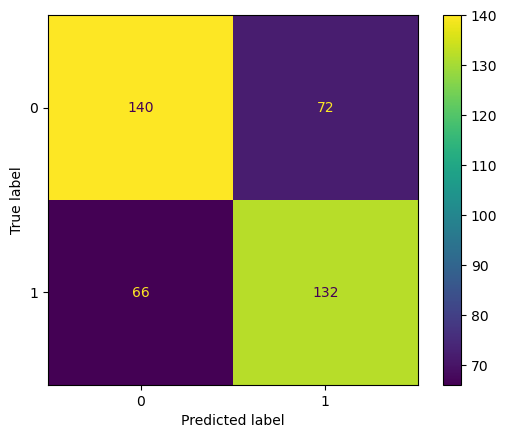

In [10]:
cm = confusion_matrix(Pipeline.results.y_test, Pipeline.results.y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()